<a href="https://colab.research.google.com/github/Nelson-Muteti/Core-IP-2-/blob/main/Nelson_Muteti_03_2021_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                  Defining The Question.

The research problem is to figure out how we can predict which
individuals are most likely to have or use a bank account.
From the dataset , I am supposed to explore the data,clean it , Conduct analysis and implement
a system that can better inform  which people are more likely to have a 
bank account in Kenya, Uganda, Tanzania and Rwanda

# The metric for success

A succesful project will have :
- Cleaned the Data appropriately
- Properly dealt with Outliers, Missing Data and Anomalies
- Conducted Univariate, Bivariate and Multivariate Exploratory Data Analysis
- Dimensionality Reduction Using PCA
- Implement a predictive model using RandomForest for determining which people are likely to have a bank account

# Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [76]:
url = '/content/Financial Dataset - 1.csv'
df = pd.read_csv(url)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [77]:
data = '/content/VariableDefinitions.csv'
variable_def = pd.read_csv(data)
variable_def.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


# Checking The data

In [78]:
df.shape

(23524, 13)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [80]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [81]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# Appropriateness of the available data

### Verify data Integrity. 

I read through this article (https://www.reuters.com/article/kenya-banking-idUSL8N21L2HK) explaining the accesibility to banking in East Africa, more so Mobile Banking.  I verified that  while the data given was appropriate, more should have been done to separate  the income gaps of  the respondents.

This survey(https://fsduganda.or.ug/finscope-2018-survey-report/) was also instrumental in verifying the data integrity.

# Experimental design taken 

I decided to First Clean the data, Remove any anomalies,outliers and Missing Values while protecting integral data points. After that, I would then perform EDA extensively to both understand and Visualise the data. Thereafter, I would use PCA for Dimensionality reduction and use RandomForest Classifier model for Predictive analysis.

# Data Cleaning

### Outliers/ Anomalies

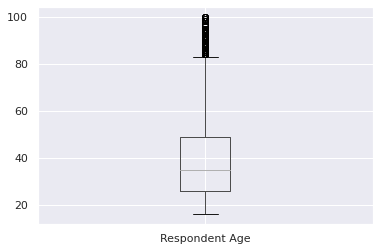

In [82]:
#check for outliers in Age column
df.boxplot(column = 'Respondent Age')

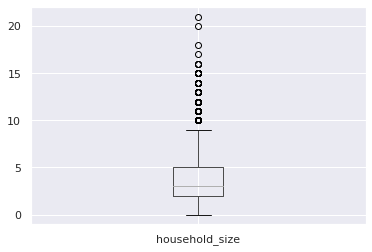

In [83]:
#check for outliers in household size column
#There seems to be a few outliers here. We will work on removing them
df.boxplot(column = 'household_size')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


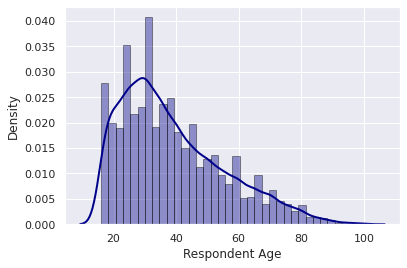

In [84]:
# Density Plot and Histogram distribution of ages of respondents
#It seems that the age has Positive Skewness therefore  the tail on the right side of the distribution is longer .
# The mean and median will be greater than the mode.
#The outliers are causing this skewness
sns.distplot(df['Respondent Age'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

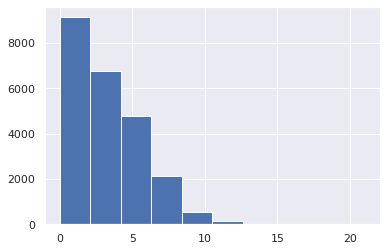

In [85]:
#distribution of household sizes
df['household_size'].hist()

In [86]:
#drop unique id column
df.drop(['uniqueid'],axis=1,inplace=True)

In [87]:
#function to get the number of outliers in specific column
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['Respondent Age']))

101

In [88]:
#function to get the number of outliers in specific column
outliers=[]

def detect_outlier(df):
    
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

len(detect_outlier(df['household_size']))

185

In [89]:
#removing the outliers and anomalies in dataset
#Get the Interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
newdf = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(newdf.shape)
print(df.shape)

(22903, 12)
(23524, 12)


### Missing data

In [90]:
#check for missing data
newdf.isnull().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

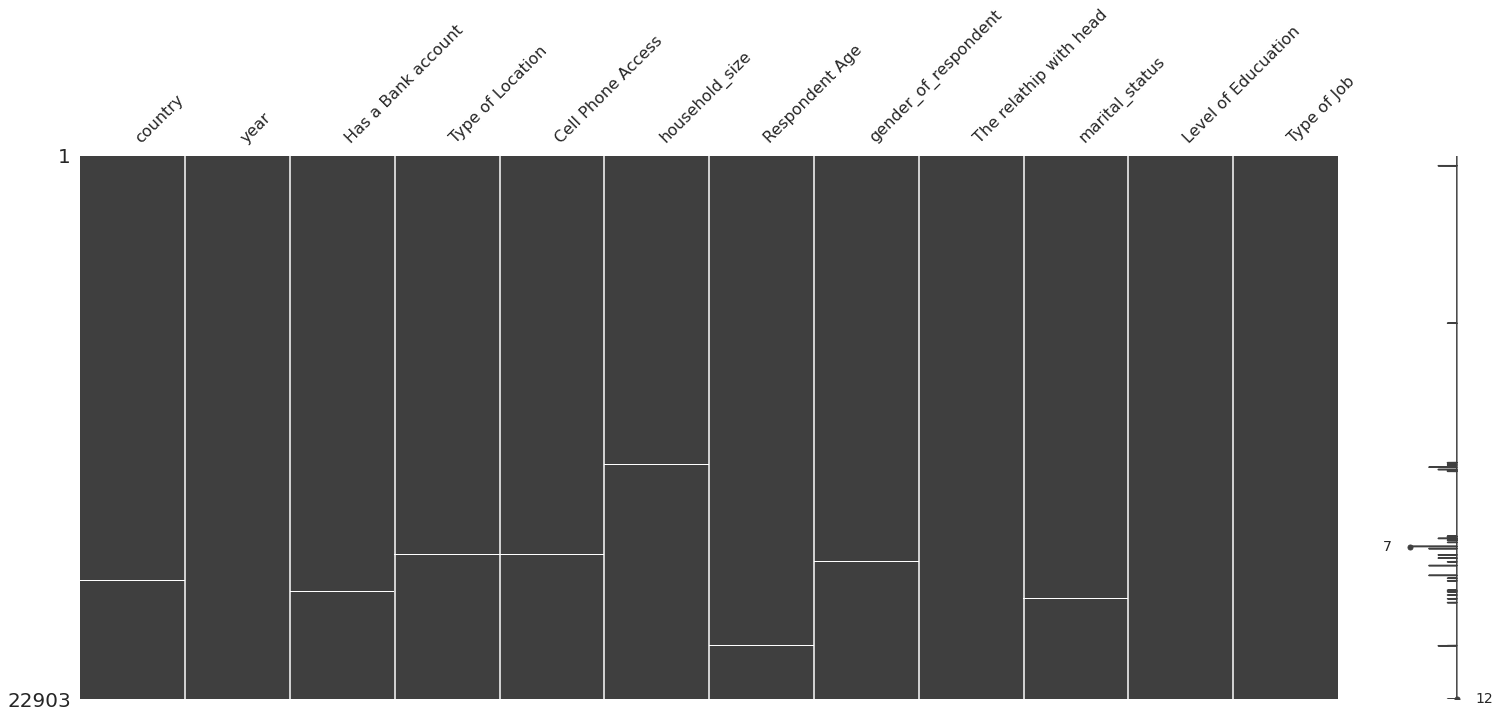

In [91]:
# Dealing with the Missing Data
import missingno as msno
%matplotlib inline
msno.matrix(newdf)

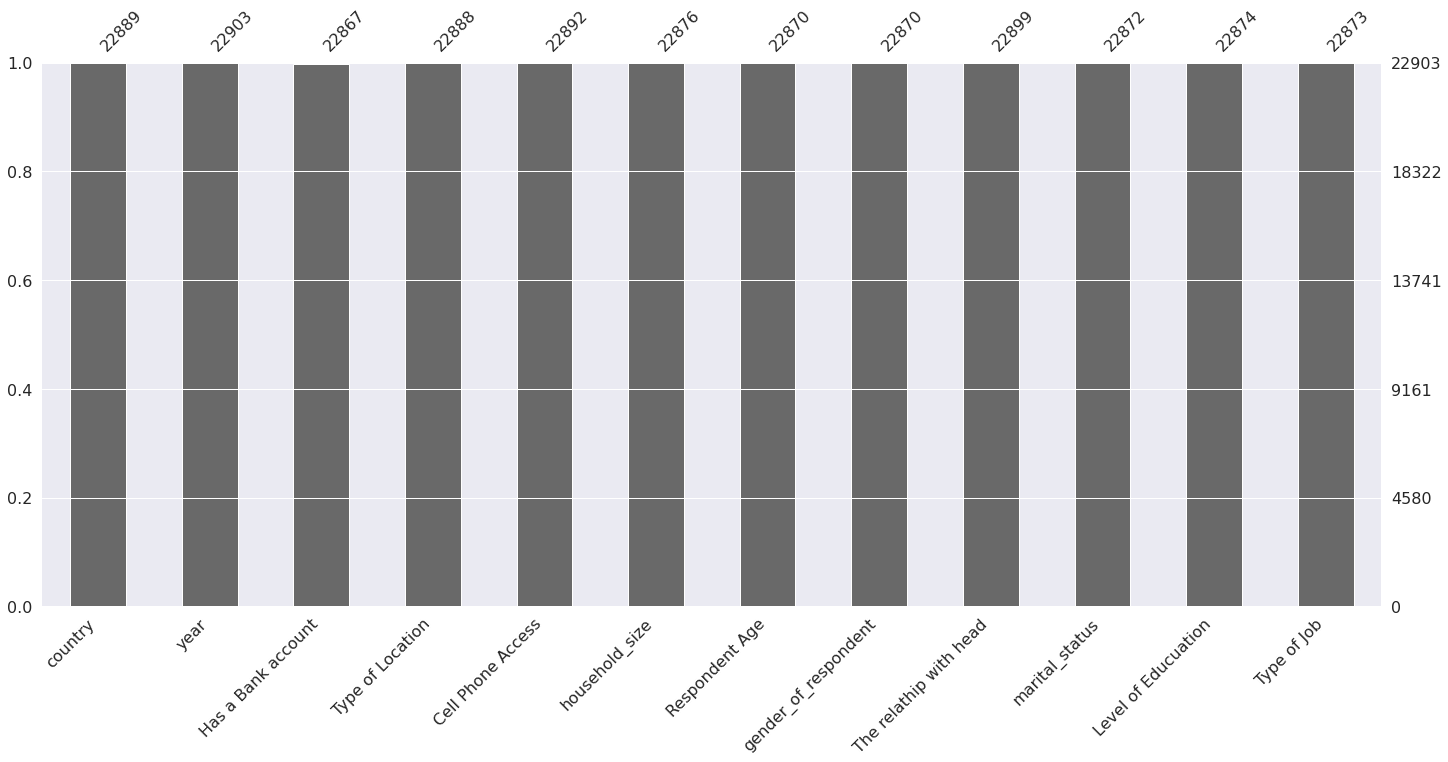

In [92]:
#visualise missing data
msno.bar(newdf)

In [93]:
newdf = newdf.dropna()
newdf.isnull().sum()

country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

### More Data Cleaning

In [94]:
#More Data Cleaning
newdf['Level of Educuation'].value_counts()

Primary education                  12443
No formal education                 4232
Secondary education                 4100
Tertiary education                  1134
Vocational/Specialised training      785
6                                     25
Other/Dont know/RTA                    6
Name: Level of Educuation, dtype: int64

In [95]:
#impute level of education to distinct levels
newdf['Level of Educuation'].replace(['Vocational/Specialised training', '6'], ['Tertiary education', 'Other/Dont know/RTA'], inplace=True)
newdf['Level of Educuation'].value_counts()

Primary education      12443
No formal education     4232
Secondary education     4100
Tertiary education      1919
Other/Dont know/RTA       31
Name: Level of Educuation, dtype: int64

In [96]:
newdf['Type of Job'].value_counts()

Self employed                   6209
Informally employed             5490
Farming and Fishing             5296
Remittance Dependent            2375
Formally employed Private       1035
Other Income                    1026
No Income                        585
Formally employed Government     382
Government Dependent             209
Dont Know/Refuse to answer       118
Name: Type of Job, dtype: int64

In [97]:
#impute the values to better responses
newdf['Type of Job'].replace(['Farming and Fishing', 'Formally employed Government','Formally employed Private'], ['Self employed', 'Formally employed','Formally employed'], inplace=True)
newdf['Type of Job'].value_counts()

Self employed                 11505
Informally employed            5490
Remittance Dependent           2375
Formally employed              1417
Other Income                   1026
No Income                       585
Government Dependent            209
Dont Know/Refuse to answer      118
Name: Type of Job, dtype: int64

In [98]:
newdf['marital_status'].value_counts()

Married/Living together    10431
Single/Never Married        7748
Widowed                     2509
Divorced/Seperated          2029
Dont know                      8
Name: marital_status, dtype: int64

In [99]:
#impute the values to better responses
newdf['marital_status'].replace(['Married/Living together', 'Single/Never Married','Divorced/Seperated','Dont know'], ['Married', 'Single','Divorced','Other'], inplace=True)
newdf['marital_status'].value_counts()

Married     10431
Single       7748
Widowed      2509
Divorced     2029
Other           8
Name: marital_status, dtype: int64

In [100]:
#The data is sufficient for exploration since anomalies,Outliers and NA values are absent
#save data file
newdf.to_csv('Bank Access Data.csv')

# EDA
Now that the data is clean, Lets explore.

## Univariate EDA

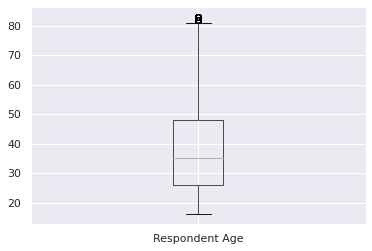

In [101]:
#Now to Univariate EDA
newdf.boxplot(column = 'Respondent Age')

Primary education      12443
No formal education     4232
Secondary education     4100
Tertiary education      1919
Other/Dont know/RTA       31
Name: Level of Educuation, dtype: int64
 
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


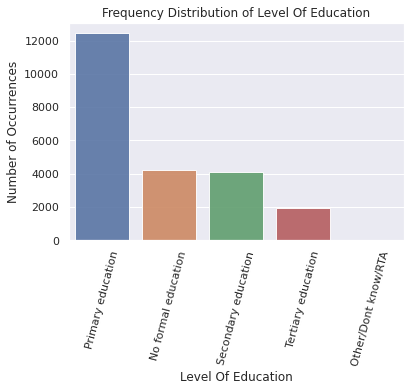

In [102]:
#Univariate exploratory Data Analysis
#A frequency distribution of Level education in dataset
edu_count = newdf['Level of Educuation'].value_counts()
print(edu_count)
print(' ')
print(' ')
sns.set(style="darkgrid")
sns.barplot(edu_count.index, edu_count.values, alpha=0.9)
plt.title('Frequency Distribution of Level Of Education')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Level Of Education', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

Rural    13810
Urban     8915
Name: Type of Location, dtype: int64
 
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


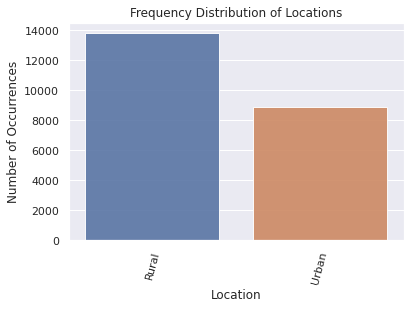

In [103]:
# More Univariate exploratory Data Analysis 
#A frequency distribution of type of locatonss in dataset
location_count = newdf['Type of Location'].value_counts()
print(location_count)
print(' ')
print(' ')
sns.set(style="darkgrid")
sns.barplot(location_count.index, location_count.values, alpha=0.9)
plt.title('Frequency Distribution of Locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

No     19490
Yes     3235
Name: Has a Bank account, dtype: int64
 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


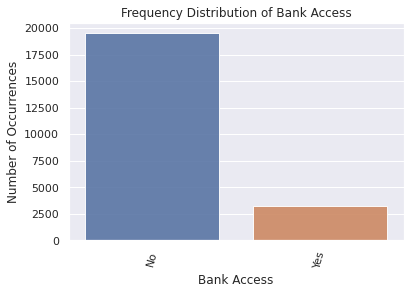

In [104]:
# More Univariate exploratory Data Analysis 
#A frequency distribution of Access to Bank accounts in dataset
# It seems that a very small number of respondents actually have a bank account
bank_count = newdf['Has a Bank account'].value_counts()
print(bank_count)
print(' ')
print('')
sns.set(style="darkgrid")
sns.barplot(bank_count.index, bank_count.values, alpha=0.9)
plt.title('Frequency Distribution of Bank Access')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bank Access', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

Yes    16985
No      5740
Name: Cell Phone Access, dtype: int64
              
              


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


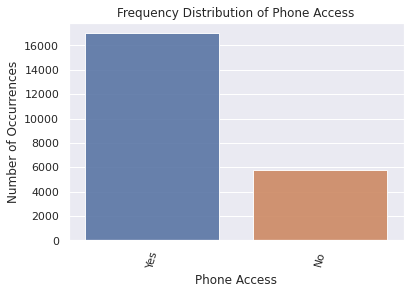

In [105]:
#Univariate exploratory Data Analysis
#A high number of respondents do have a cell phone
#We will check the correlation between owning a cell phone and access to banks in Bivariate Analysis
phone_count = newdf['Cell Phone Access'].value_counts()
print(phone_count)
print('              ')
print('              ')
sns.set(style="darkgrid")
sns.barplot(phone_count.index, phone_count.values, alpha=0.9)
plt.title('Frequency Distribution of Phone Access')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Phone Access', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

Self employed                 11505
Informally employed            5490
Remittance Dependent           2375
Formally employed              1417
Other Income                   1026
No Income                       585
Government Dependent            209
Dont Know/Refuse to answer      118
Name: Type of Job, dtype: int64
 
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


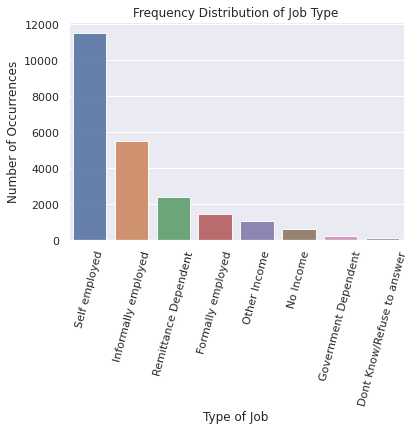

In [106]:
#Univariate exploratory Data Analysis
job_count = newdf['Type of Job'].value_counts()
print(job_count)
print(' ')
print(' ')
sns.set(style="darkgrid")
sns.barplot(job_count.index, job_count.values, alpha=0.9)
plt.title('Frequency Distribution of Job Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type of Job', fontsize=12)
plt.xticks(rotation = 75)
plt.show()

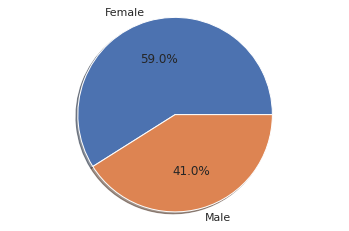

In [107]:
#Univariate exploratory Data Analysis
labels = newdf['gender_of_respondent'].astype('category').cat.categories.tolist()
counts = newdf['gender_of_respondent'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
ax1.axis('equal')
plt.show()

In [108]:
# Finding the min and max values of the Respondent ages
max_age = newdf['Respondent Age'].max()
min_age = newdf['Respondent Age'].min()
print('Maximum Age is ',max_age)
print('Minimum Age is ',min_age)
# Calculating the range of ages
print('Range of age is ',max_age - min_age)

Maximum Age is  83.0
Minimum Age is  16.0
Range of age is  67.0


In [109]:
#checking the skewness of ages from the data
#The positive value means the distribution of ages  is positively skewed.
newdf['Respondent Age'].skew()

0.7402138281724044

In [110]:
#checking the Kurtosis of age from the data
# This is a platykurtic distribution since it is a negative figure.
#A platykurtic distribution will have thinner tails than a normal distribution, 
#resulting in fewer extreme positive or negative events. Therefore less outliers
newdf['Respondent Age'].kurt()

-0.23749387799691757

In [111]:
# Displaying the summary statistics of the age column
newdf['Respondent Age'].describe()

count    22725.000000
mean        38.347987
std         15.806141
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: Respondent Age, dtype: float64

In [112]:
newdf['Type of Job'].value_counts()

Self employed                 11505
Informally employed            5490
Remittance Dependent           2375
Formally employed              1417
Other Income                   1026
No Income                       585
Government Dependent            209
Dont Know/Refuse to answer      118
Name: Type of Job, dtype: int64

## Bivariate Data Exploration

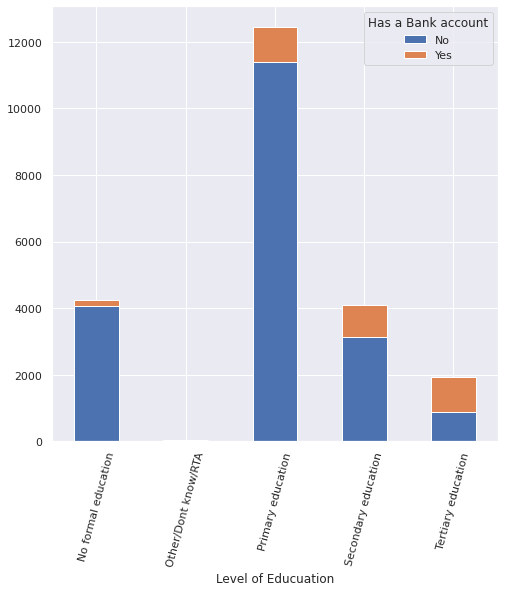

Has a Bank account,No,Yes
Level of Educuation,,
No formal education,4071,161
Other/Dont know/RTA,20,11
Primary education,11382,1061
Secondary education,3132,968
Tertiary education,885,1034


In [113]:
#bivariate eda ( Stacked Bar Charts)
#Relation between Level Of education and Access to banking
mytab = pd.crosstab(index=newdf['Level of Educuation'], 
                          columns=newdf['Has a Bank account'])

mytab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.xticks(rotation = 75)
plt.show()
print(' ')
print(' ')
mytab

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

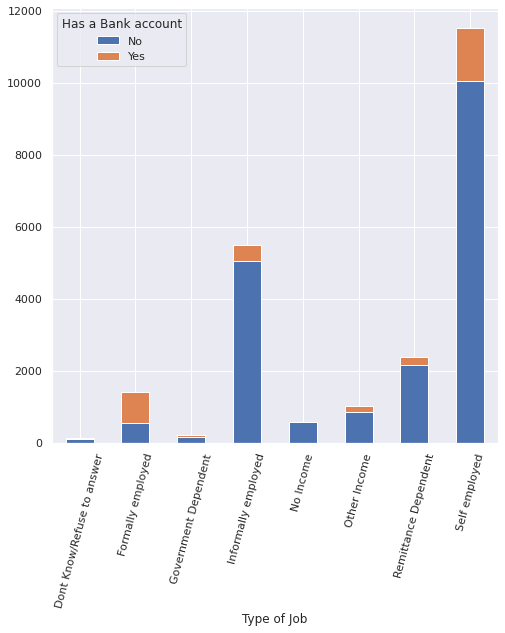

In [114]:
#Relation between Type of Job and Access to banking
mytab = pd.crosstab(index=newdf['Type of Job'], 
                          columns=newdf['Has a Bank account'])
mytab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.xticks(rotation = 75)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

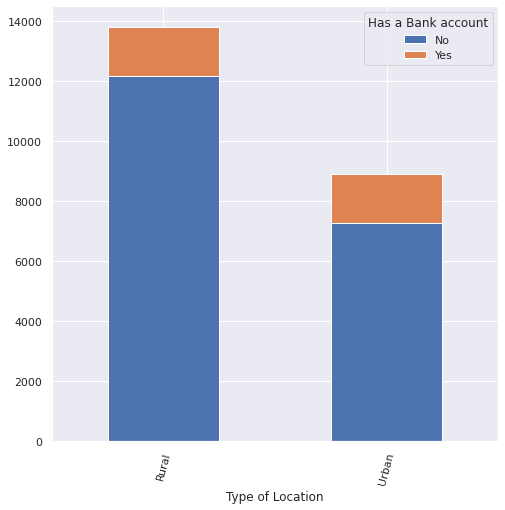

In [115]:
#Relation between Location and Access to banking
mytab = pd.crosstab(index=newdf['Type of Location'], 
                          columns=newdf['Has a Bank account'])
mytab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.xticks(rotation = 75)

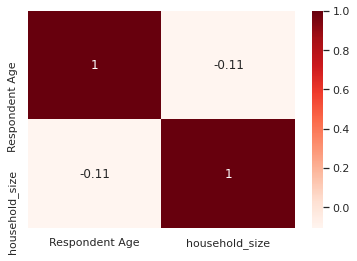

In [116]:
# Creating a matrix using Age and Household size as rows and columns
newdf[['Respondent Age','household_size']].corr()

#plot the correlation matrix of Age and Household size in newdf dataframe.
sns.heatmap(newdf[['Respondent Age','household_size']].corr(), annot=True, cmap = 'Reds')
plt.show()
#It seems that there is negative/no correlation between age and household size of respondents

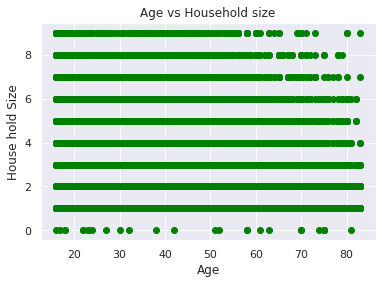

In [117]:
#scatter plot to check relation between Numerical values in data
plt.scatter(newdf['Respondent Age'],newdf['household_size'],color = 'green')
plt.title('Age vs Household size')
plt.xlabel('Age')
plt.ylabel('House hold Size')
plt.show()

In [118]:
#find correlation between numerical 
#It seems that there is almost no correlation between the age of respondents and household size
coeff = newdf['Respondent Age'].corr(newdf['household_size'])
coeff


-0.1062088216975987

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


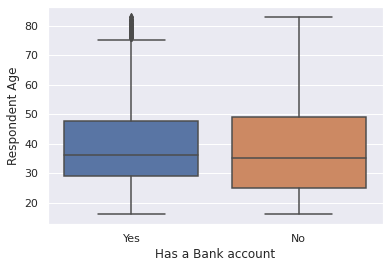

In [119]:
#plot the box plot of having a bank account and respondent age
sns.boxplot(newdf['Has a Bank account'], newdf['Respondent Age'])
plt.show()

## Multivariate EDA

In [120]:
newdf['Bank_Account'] = np.where(newdf['Has a Bank account']=='Yes',1,0)
newdf.Bank_Account.value_counts()

0    19490
1     3235
Name: Bank_Account, dtype: int64

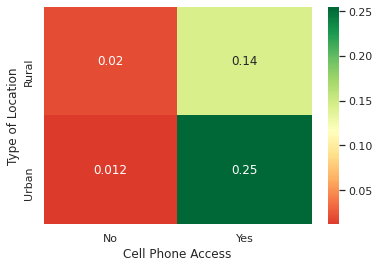

In [121]:
#Multivariate Exploratory Data Analysis
result = pd.pivot_table(data=newdf, index='Type of Location', columns='Cell Phone Access',values='Bank_Account')

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

#Based on the Heatmap we can infer that people living in Urban areas 
#with access to a cell phone are more  likely to have a bank account while
#people living in Rural areas  with no access to a cell phone are less  likely to have a bank account

#Genrally, cell phone access has a strong correlation to Access of banks irrespective of Location

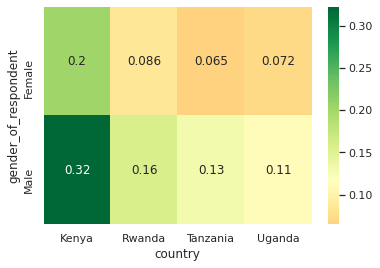

In [122]:
#Multivariate Exploratory Data Analysis
result = pd.pivot_table(data=newdf, index='gender_of_respondent', columns='country',values='Bank_Account')

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

#Based on the Heatmap we can infer that Males living in Kenya 
# are more  likely to have a bank account while
#Females living in Tanzania  are less  likely to have a bank account

#Women living in Kenya actually have a higher access to bank account that Men in the other 
#Countries... Interesting insight.

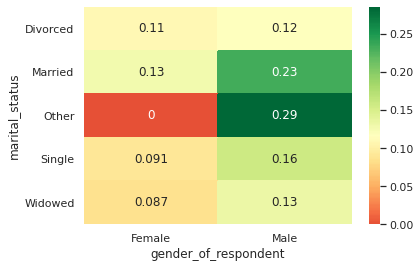

In [123]:
#Multivariate Exploratory Data Analysis
result = pd.pivot_table(data=newdf, index='marital_status', columns='gender_of_respondent',values='Bank_Account')

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()



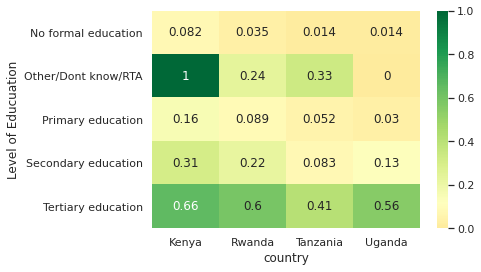

In [124]:
#Multivariate Exploratory Data Analysis
result = pd.pivot_table(data=newdf, index='Level of Educuation', columns='country',values='Bank_Account')

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

#Based on the Heatmap we can infer having a formal education or a skilled training irregardless of country
#has a strong correlation of having access to a bank account while not having
# a formal education or just basic education reduces access to bank account. 

In [125]:
newdf.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job', 'Bank_Account'],
      dtype='object')

In [126]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   Has a Bank account      22725 non-null  object 
 3   Type of Location        22725 non-null  object 
 4   Cell Phone Access       22725 non-null  object 
 5   household_size          22725 non-null  float64
 6   Respondent Age          22725 non-null  float64
 7   gender_of_respondent    22725 non-null  object 
 8   The relathip with head  22725 non-null  object 
 9   marital_status          22725 non-null  object 
 10  Level of Educuation     22725 non-null  object 
 11  Type of Job             22725 non-null  object 
 12  Bank_Account            22725 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 3.1+ MB


# Implementation Of the solution

Here, I use Principal Component Analysis (PCA)  for Dimensionality Reduction and Random Forest for building a Predictive model that determines whether someone has a Bank Account or not. PCA Helps in Dimensionality reduction hence making it the appropriate model for this task

### Principal Component Analysis

In [149]:
#preprocessing..that is dividing the dataset into a feature set and corresponding labels
X = newdf[['country', 'year', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job']] 
X = pd.get_dummies(data=X)

In [150]:
# preprocessing..that is dividing the dataset into a feature set and corresponding labels
Y = newdf['Has a Bank account']
Y = pd.get_dummies(data=Y)

In [151]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [152]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [154]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.03108316e-01, 8.11883584e-02, 7.63468378e-02, 6.82663525e-02,
       5.63472386e-02, 5.01529472e-02, 4.41001475e-02, 4.30293841e-02,
       3.85481663e-02, 3.64304643e-02, 3.29500456e-02, 2.84479473e-02,
       2.81429151e-02, 2.77153591e-02, 2.72514097e-02, 2.71411510e-02,
       2.68012564e-02, 2.65189609e-02, 2.52560863e-02, 2.45851121e-02,
       2.30561088e-02, 2.13402000e-02, 1.80559301e-02, 1.71469064e-02,
       1.45612742e-02, 1.25856866e-02, 1.10470983e-02, 9.87833891e-03,
       5.75247284e-32, 1.83284737e-32, 7.93552302e-33, 4.33858509e-33,
       2.73888385e-33, 2.43020053e-33, 1.65040363e-33, 3.57371082e-34,
       1.34759166e-34])

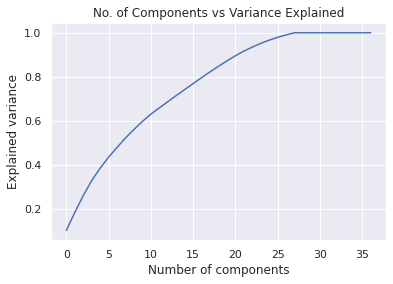

In [162]:
#Plotting explained variance vs Components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('No. of Components vs Variance Explained')
plt.show()

In [133]:
#Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [134]:
# Training and test the model. Use Random Forests
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [135]:
#  Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test.values.argmax(axis=1),y_pred.argmax(axis=1))
cm


array([[3896,    0],
       [ 649,    0]])

In [136]:
#85% accuracy level when using PCA with 1 component
print('Accuracy' , accuracy_score(y_test, y_pred))

Accuracy 0.8572057205720572


Now With 2 Components

In [137]:
#Applying PCA with 2 Principal Components
X = newdf[['country', 'year', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job']] 
X = pd.get_dummies(data=X)

In [138]:
Y = newdf['Has a Bank account']
Y = pd.get_dummies(data=Y)

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [140]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [142]:
# Training and test the model. Use Random Forests
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [143]:
#86% accuracy level when using PCA with 2 components
print('Accuracy' , accuracy_score(y_test, y_pred))

Accuracy 0.8699669966996699


3 Principal components

In [144]:
#Results with 3 Principal Components
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [145]:
y_pred = classifier.predict(X_test)

In [146]:
#86% accuracy level when using PCA with 3 components
print('Accuracy' , accuracy_score(y_test, y_pred))

Accuracy 0.8602860286028603


# Challenging The solution

 While the model used (PCA) helps in simplifying the problem of dimensionality, other models such as Multiple linear regressions could have done the job. 

 The accuracy level only increases by about 0.9% after performing with 2 and 3 Principal Components.In order to increase the accuracy exponentially, other Supervised Learning Techniques like K-Nearest Neighbours or Logistic Regression could probably be applied.
